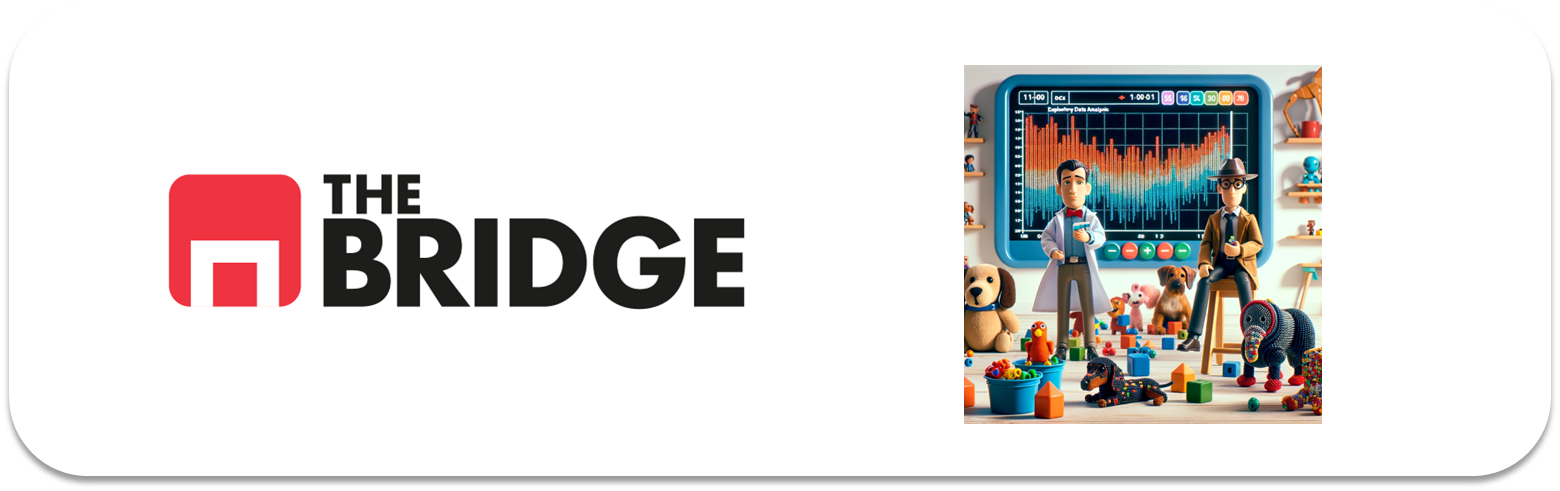

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [89]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [13]:
titanic= pd.read_csv("./data/titanic.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [15]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [ ]:
titanic.drop(columns=["embarked"],inplace=True)


KeyError: "['embarked'] not found in axis"

In [22]:
titanic.head(5)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [24]:
titanic["family_members"]= titanic["parch"]+titanic["sibsp"]
titanic.head(5)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0


In [ ]:
titanic.drop(columns=["sibsp","parch"],inplace=True)


KeyError: "['sibsp', 'parch'] not found in axis"

In [28]:
titanic.head(5)


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [30]:
titanic["embark_town"].mode()

0    Southampton
Name: embark_town, dtype: object

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [31]:
titanic.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [44]:
# esto fue explicado en la revieuw anterior
man = titanic["who"]== "man"
woman = titanic["who"]== "woman"
child = titanic["who"]== "child"
media_man=titanic.loc[man,"age"].mean()
media_woman=titanic.loc[woman,"age"].mean()
media_child=titanic.loc[child,"age"].mean()
nulos= titanic["age"].isna()

titanic.loc[man&nulos,"age"]=media_man
titanic.loc[woman&nulos,"age"]=media_woman
titanic.loc[child&nulos,"age"]=media_child

titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

RESPUESTA : en valor abosluto mas mujeres sobrevivieron, en terminos relativo hay una relacion estadísticamente significativa entre el sexo y la supervivencia en la cual tenia mas probabilidad de soperviviencia siendo mujer, luego niños y finalemente hombre con un % respectivo de 76, 59 ou 16%.La probabilidad parece que se podria extrapolar, se verifica las relacion estadistica entre las 2 variables.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

RESPESUTA : en valor abosluto 136 pasajeros de primera sobrevivieron y solo 87 se segunda. En termino relativo hay 63 % de probabilidad de sobrevivir en primera y solo 24 en tercera. La probabilidad parece que se podria extrapolar, se verifica las relacion estadistica entre las 2 variables.

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

RESPUESTA : en terminos absolutos hay mas personas de S que sobrevivieron pero en realidad solo 34% sobrevivieron contra 55% de C. Y parece que seria extrapolable pero esto me extraña! Quizas habria que hacer una prueba distinta pero no creo que tenga sentido la verdad. 

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

RESPUESTA : si parece que a mas precio mas probabilidad de quedarse vivo.

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

RESPUESTA: de las 15 personas que no pagaron, 14 han fallecido y de las 3 personas que compraron > 512, todas estan vivas

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

RESPUESTA: ninguno de los billetes carros se compraron desde Queenstown, y el indice de fallecido es mucho mas alto en los billetes inferiores a 20 que a mayore a 150.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

RESPUESTA: podemos ver claramente que hubo mas sopervivientes mayores de 40 en primera clase que en tercera, pero en los niños sobrevivieron mas de tercera clase. Quizas porque habia mas simplemente. Efectivamente, vemos que hubo solo 6 niños en primera contra 58 en tercera clase. 
en los fallecidos, no superan los 20 en en cualquier edad en la primera clase, pero en la tercera sube hasta 60 fallecidos alrededor de los 30. 

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

RESPUESTA: parece que no tienen correlacion

In [ ]:
#8
supervivientes[["fare","age"]].corr()

,fare,age
fare,1.000000,0.144418
age,0.144418,1.000000


In [132]:
from scipy.stats import pearsonr

pearsonr(supervivientes["fare"], supervivientes["age"], alternative= "less")

PearsonRResult(statistic=np.float64(0.14441814612661957), pvalue=np.float64(0.9962637483247536))

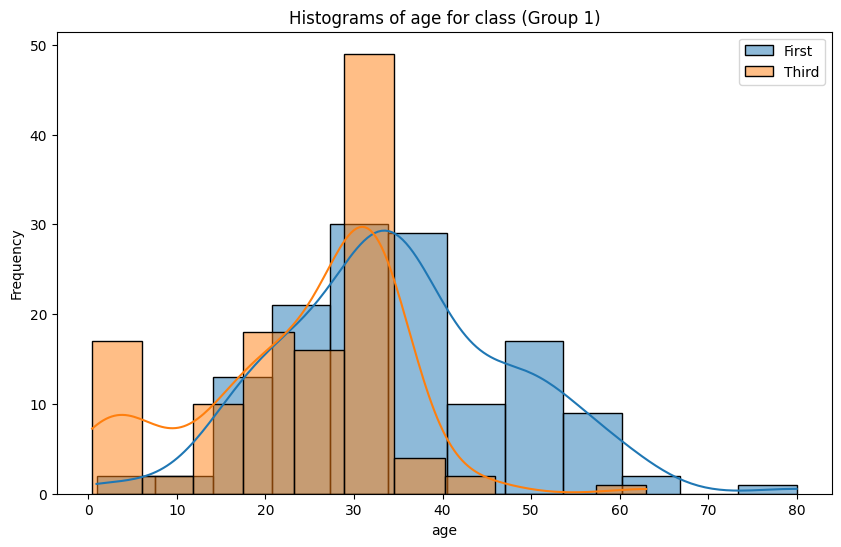

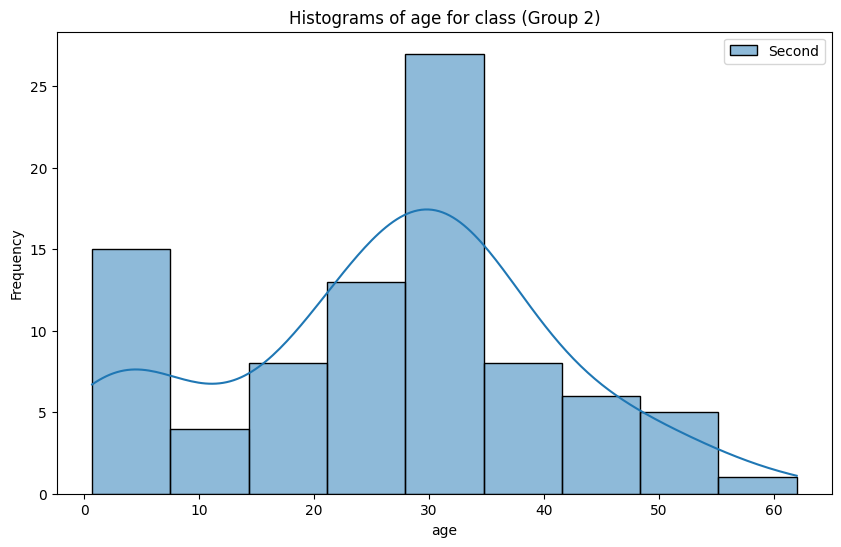

In [124]:

#7.
supervivientes= titanic.loc[titanic["alive"]=="yes"]
fallecidos=titanic.loc[titanic["alive"]=="no"]
plot_grouped_histograms(supervivientes, cat_col="class",num_col="age", group_size= 2)

In [125]:
titanic.loc[titanic.who=="child"]["class"].value_counts()

class
Third     58
Second    19
First      6
Name: count, dtype: int64

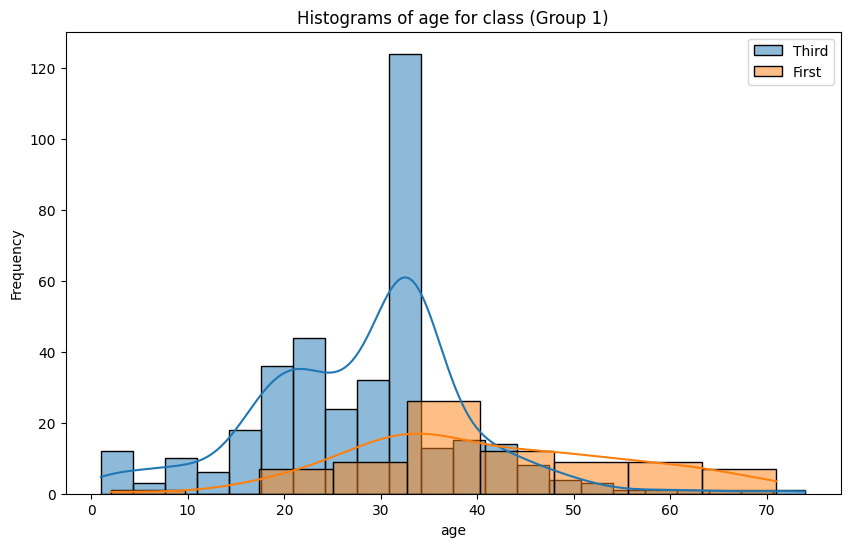

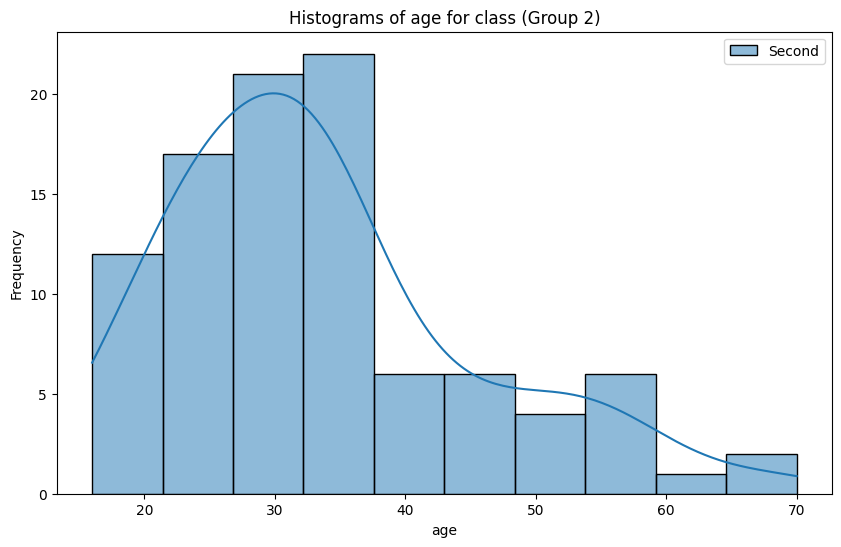

In [126]:
plot_grouped_histograms(fallecidos, cat_col="class",num_col="age", group_size= 2)

In [120]:
#6
inferior20 = titanic.loc[titanic.fare<20]
print(inferior20.groupby("embark_town")["alive"].value_counts())
print("\n")
mayor150 = titanic.loc[titanic.fare>150]
print(mayor150.groupby("embark_town")["alive"].value_counts())

embark_town  alive
Cherbourg    no        43
             yes       27
Queenstown   no        39
             yes       26
Southampton  no       290
             yes       90
Name: count, dtype: int64


embark_town  alive
Cherbourg    yes       9
             no        3
Southampton  yes      11
             no        6
Name: count, dtype: int64


In [103]:
#5. 
titanic.loc[titanic.fare== 0]["alive"].value_counts()


alive
no     14
yes     1
Name: count, dtype: int64

In [108]:
titanic.fare.max()
titanic.loc[titanic.fare> 512]["alive"].value_counts()


alive
yes    3
Name: count, dtype: int64

(2,)


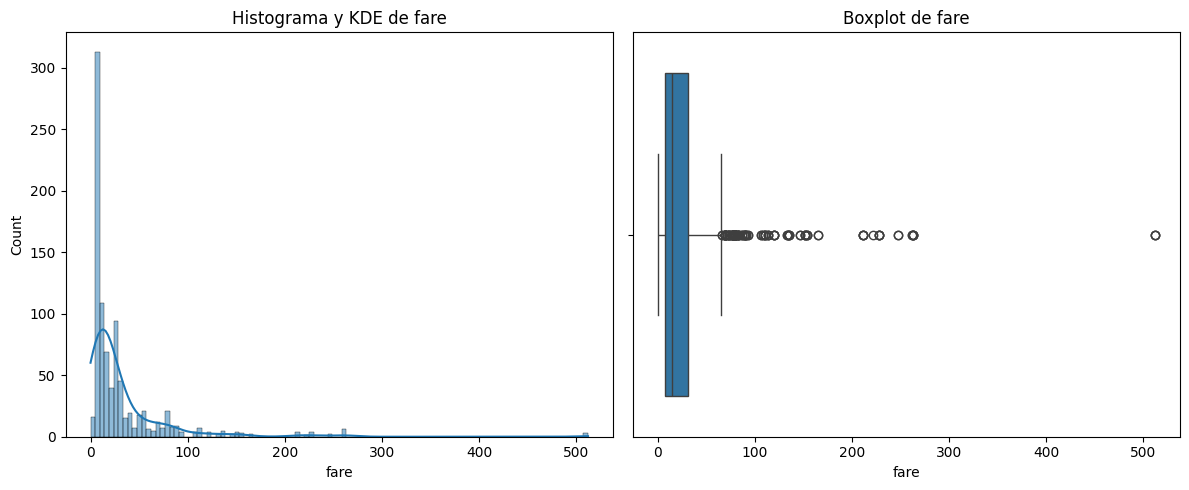

In [92]:
plot_combined_graphs(titanic,["fare"])

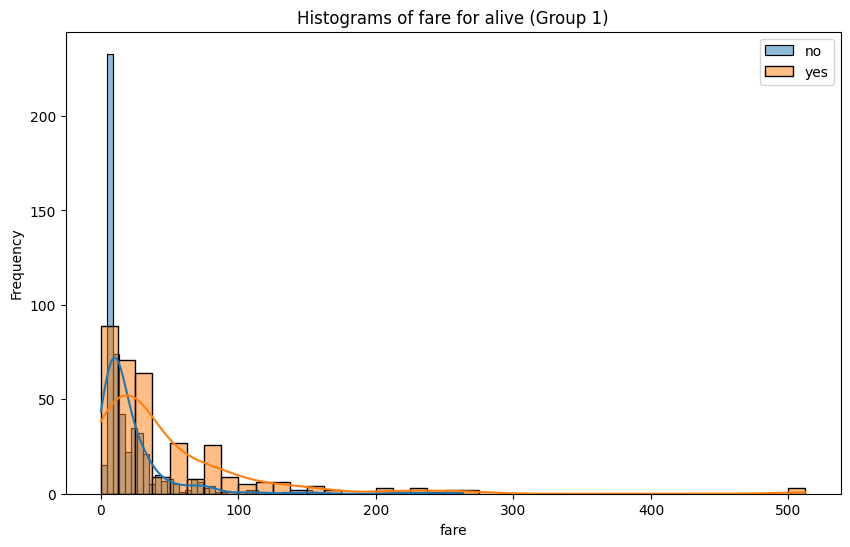

In [89]:
#4. numericas con categorica
plot_grouped_histograms(titanic, cat_col="alive",num_col="fare", group_size= 2)
#podriamos usar la U-Student si la curba fuese de Gauss, pero no es el caso. Haremos el Whithney


In [90]:
from scipy.stats import mannwhitneyu

In [91]:
grupo_a = titanic.loc[titanic.alive == "Yes"]["fare"]
grupo_b = titanic.loc[titanic.alive == "No"]["fare"]
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: nan
Valor p: nan


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5988\1127618507.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)


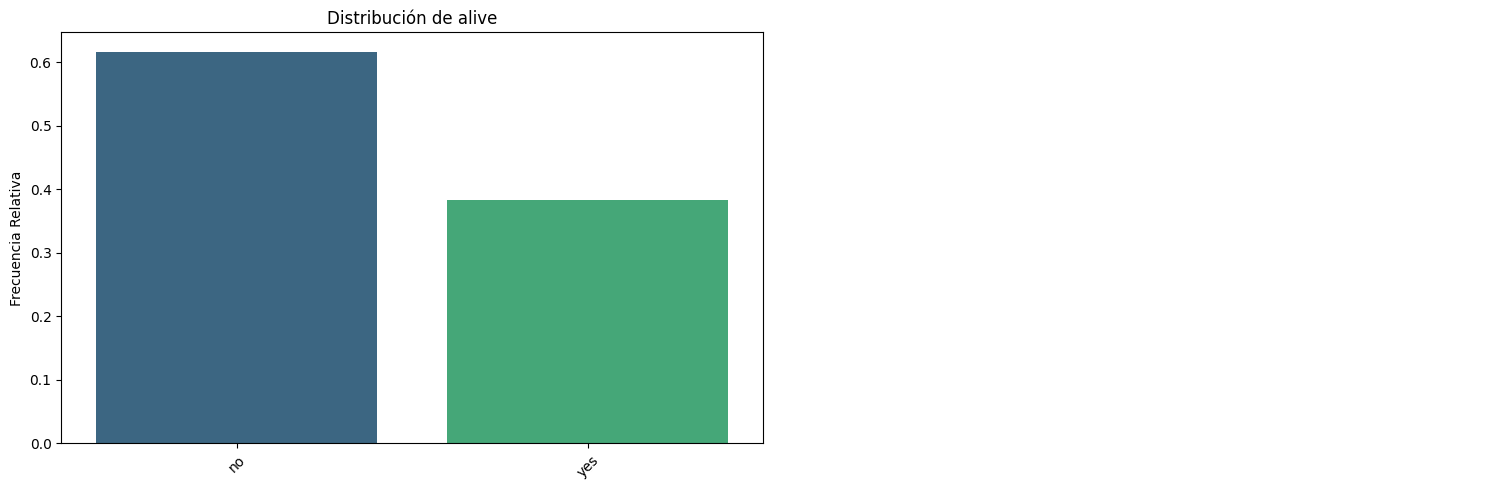

In [45]:
pinta_distribucion_categoricas(titanic,["alive"], relativa= True)

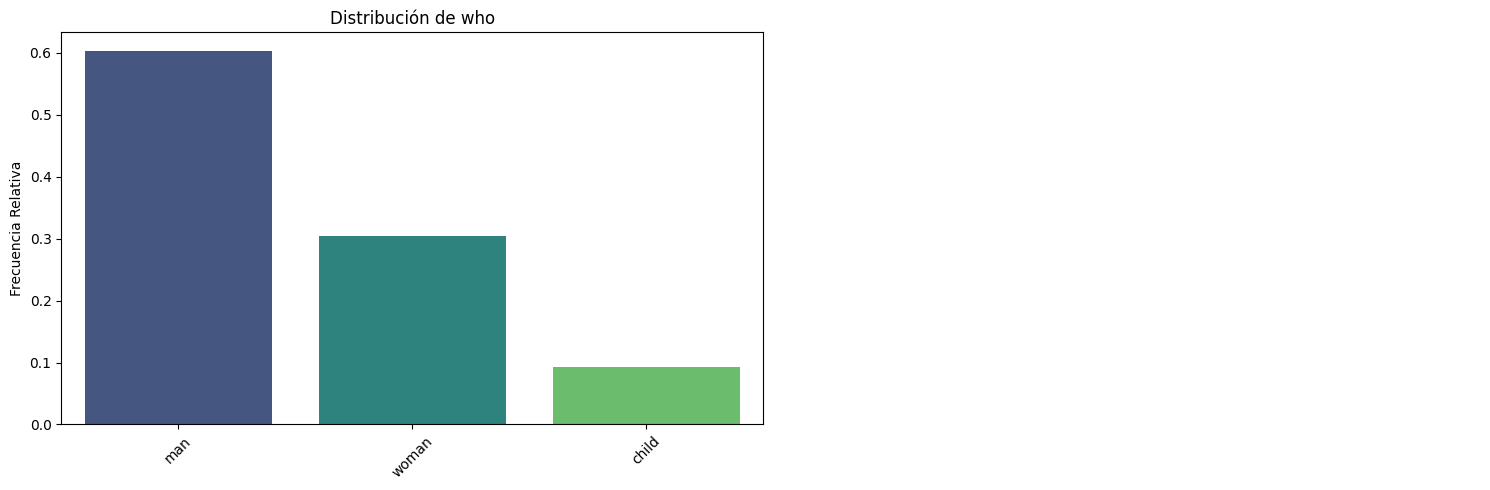

In [46]:
pinta_distribucion_categoricas(titanic,["who"], relativa= True)

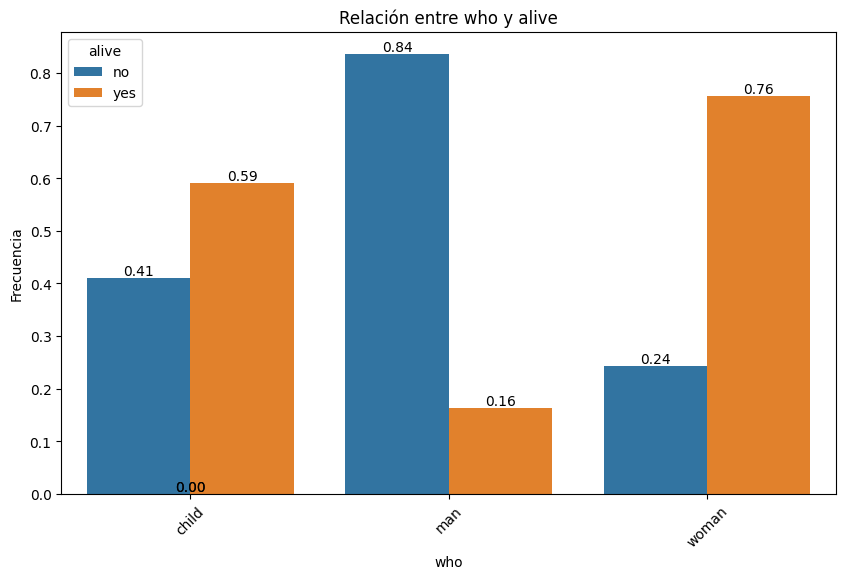

In [48]:
plot_categorical_relationship_fin(titanic, "who","alive", relative_freq = True, show_values = True)

In [ ]:
# con este vemos ya claramente que hay una relacion entre la soperviviencia y el sexo. Solo 16% e hombre sobrevivieron contra el 76% de las mujeres

In [71]:
#si extrapolamos los datos
tabla_contingencia = pd.crosstab(titanic['alive'], titanic['who'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


In [80]:
titanic.groupby("who")["alive"].value_counts()

who    alive
child  yes       49
       no        34
man    no       449
       yes       88
woman  yes      205
       no        66
Name: count, dtype: int64

In [81]:
valor_absoluto=titanic.groupby(["who","alive"]).count()
valor_absoluto

sex  age  fare  class  adult_male  embark_town  alone  \
who   alive                                                          
child no      34   34    34     34          34           34     34   
      yes     49   49    49     49          49           49     49   
man   no     449  449   449    449         449          449    449   
      yes     88   88    88     88          88           88     88   
woman no      66   66    66     66          66           66     66   
      yes    205  205   205    205         205          203    205   

             family_members  
who   alive                  
child no                 34  
      yes                49  
man   no                449  
      yes                88  
woman no                 66  
      yes               205

In [68]:
valor_absoluto=titanic.groupby(["alive","class"]).count()
valor_absoluto

sex  age  fare  who  adult_male  embark_town  alone  \
alive class                                                         
no    First    80   80    80   80          80           80     80   
      Second   97   97    97   97          97           97     97   
      Third   372  372   372  372         372          372    372   
yes   First   136  136   136  136         136          134    136   
      Second   87   87    87   87          87           87     87   
      Third   119  119   119  119         119          119    119   

              family_members  
alive class                   
no    First               80  
      Second              97  
      Third              372  
yes   First              136  
      Second              87  
      Third              119

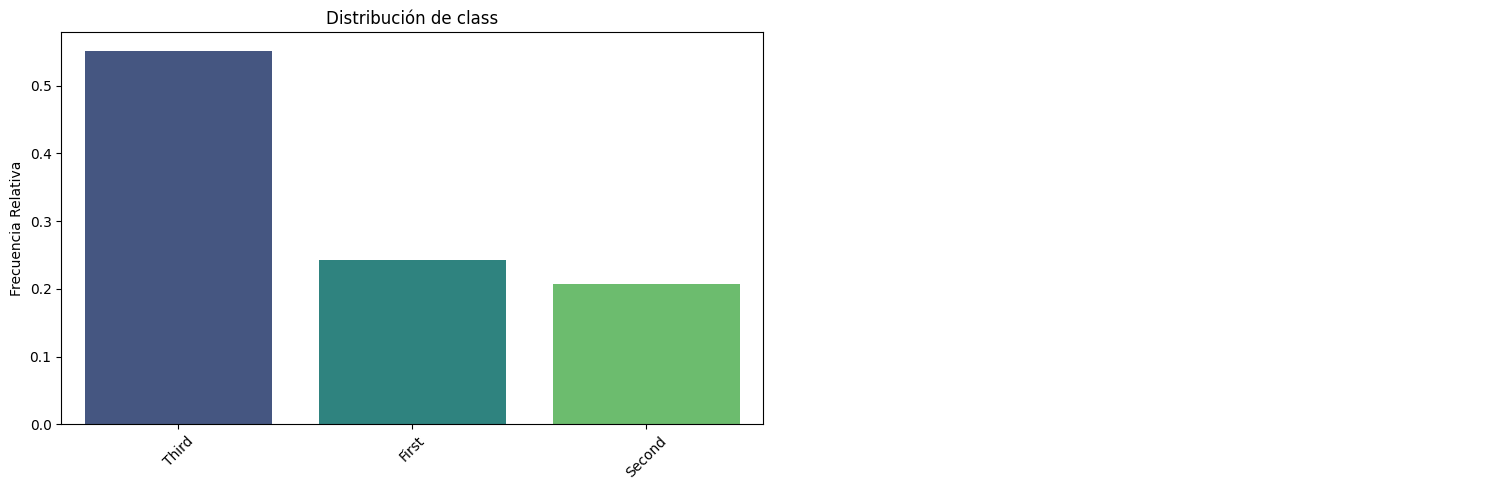

In [69]:
pinta_distribucion_categoricas(titanic,["class"], relativa= True)

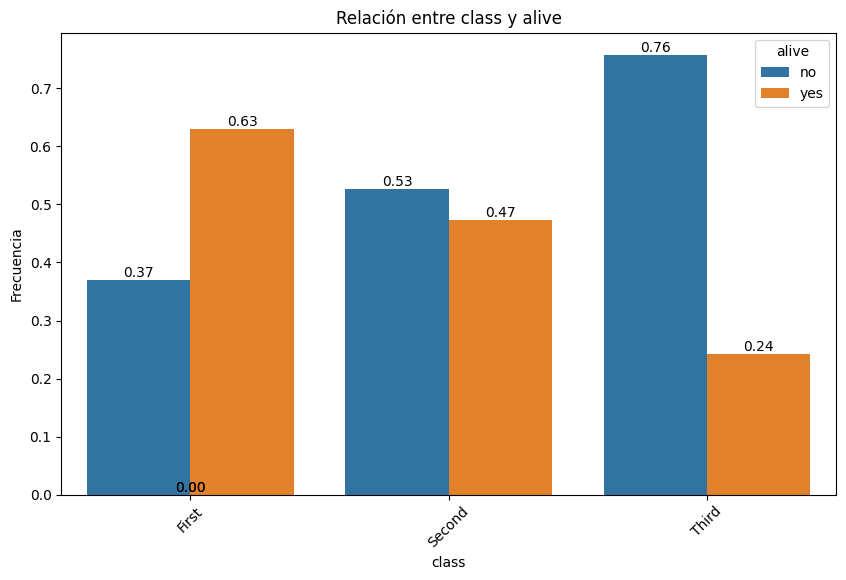

In [70]:
plot_categorical_relationship_fin(titanic, "class","alive", relative_freq = True, show_values = True)

In [72]:
#si extrapolamos los datos
tabla_contingencia = pd.crosstab(titanic['alive'], titanic['class'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


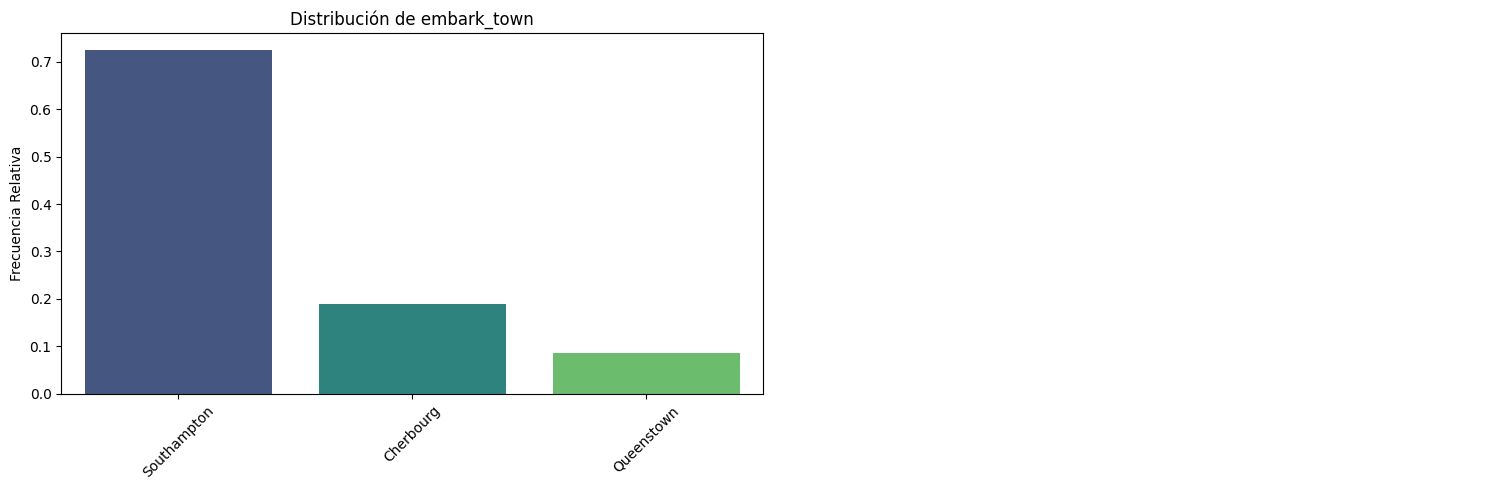

In [73]:
pinta_distribucion_categoricas(titanic,["embark_town"], relativa= True)

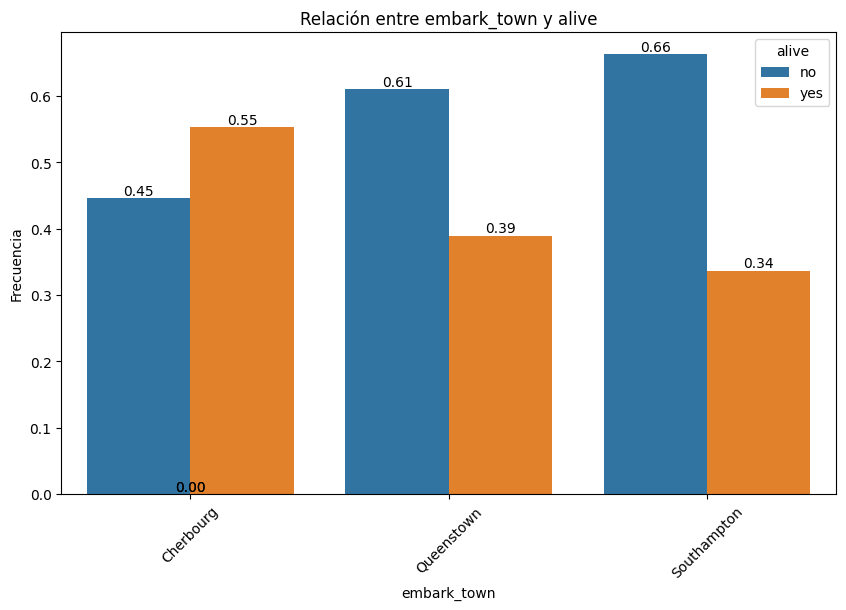

In [75]:
plot_categorical_relationship_fin(titanic, "embark_town","alive", relative_freq = True, show_values = True)

In [76]:
valor_absoluto=titanic.groupby(["alive","embark_town"]).count()
valor_absoluto

sex  age  fare  class  who  adult_male  alone  \
alive embark_town                                                  
no    Cherbourg     75   75    75     75   75          75     75   
      Queenstown    47   47    47     47   47          47     47   
      Southampton  427  427   427    427  427         427    427   
yes   Cherbourg     93   93    93     93   93          93     93   
      Queenstown    30   30    30     30   30          30     30   
      Southampton  217  217   217    217  217         217    217   

                   family_members  
alive embark_town                  
no    Cherbourg                75  
      Queenstown               47  
      Southampton             427  
yes   Cherbourg                93  
      Queenstown               30  
      Southampton             217

In [77]:
#si extrapolamos los datos
tabla_contingencia = pd.crosstab(titanic['alive'], titanic['embark_town'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 26.48914983923762
P-Value: 1.769922284120912e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.7480315  47.5511811 397.7007874]
 [ 64.2519685  29.4488189 246.2992126]]


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [66]:
viajes = pd.read_csv("./data/dataset_viajes_jun.csv")
viajes.head(5)
viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
 10  mes         600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 47.6+ KB


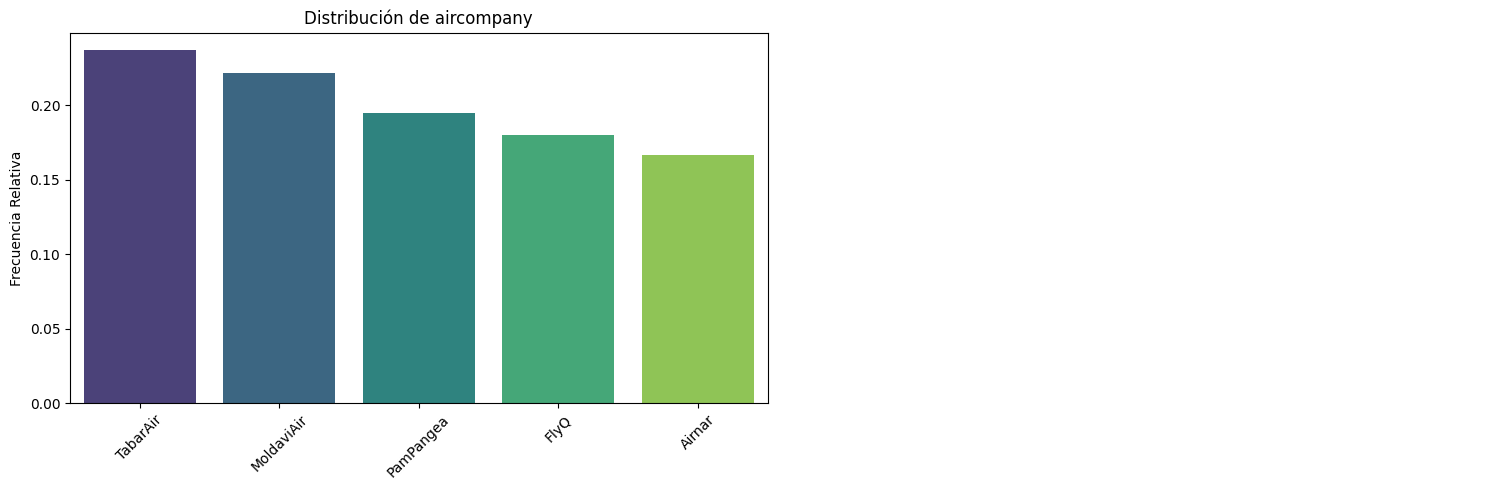

In [ ]:
#revemos la categorica
pinta_distribucion_categoricas(viajes,["aircompany"], relativa= True)

(2,)


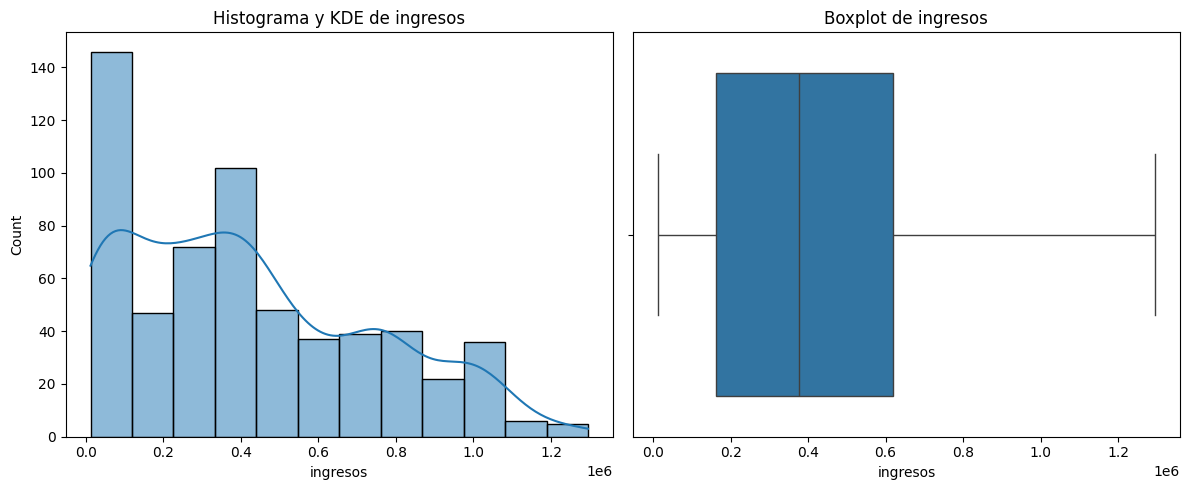

In [18]:
#revemos la numerica
plot_combined_graphs(viajes,["ingresos"])

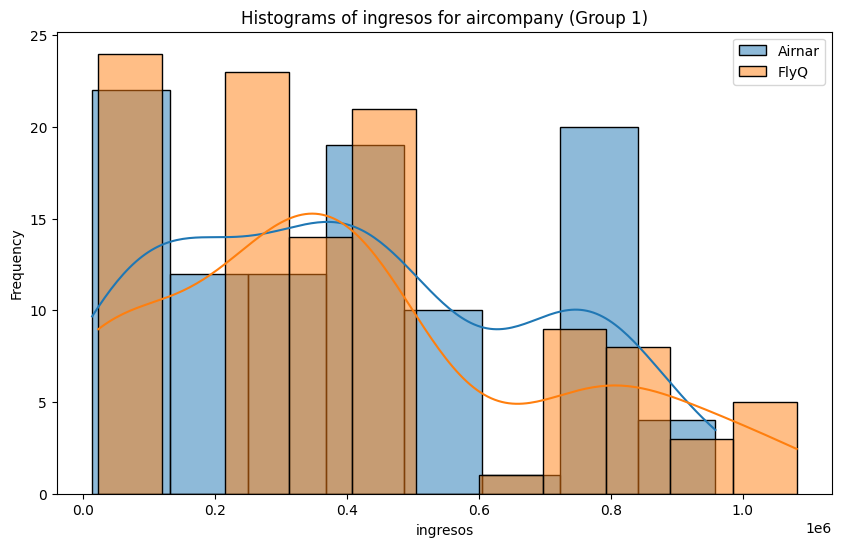

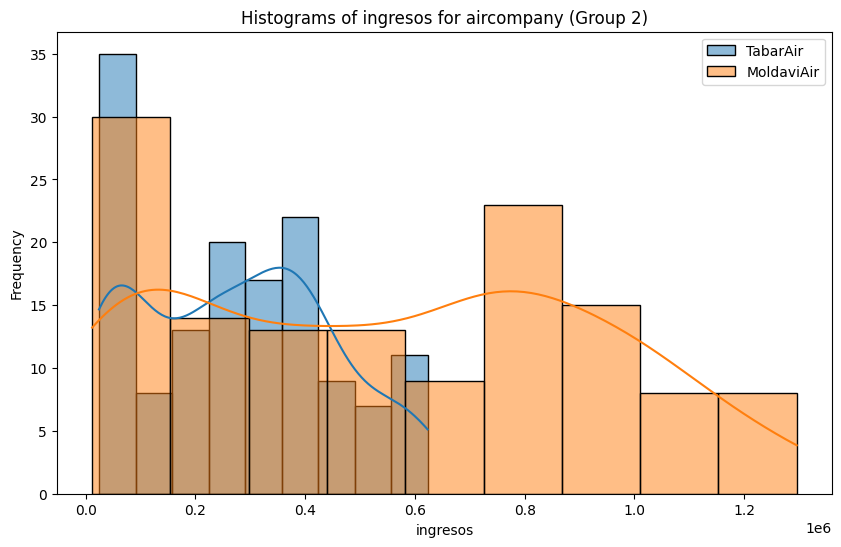

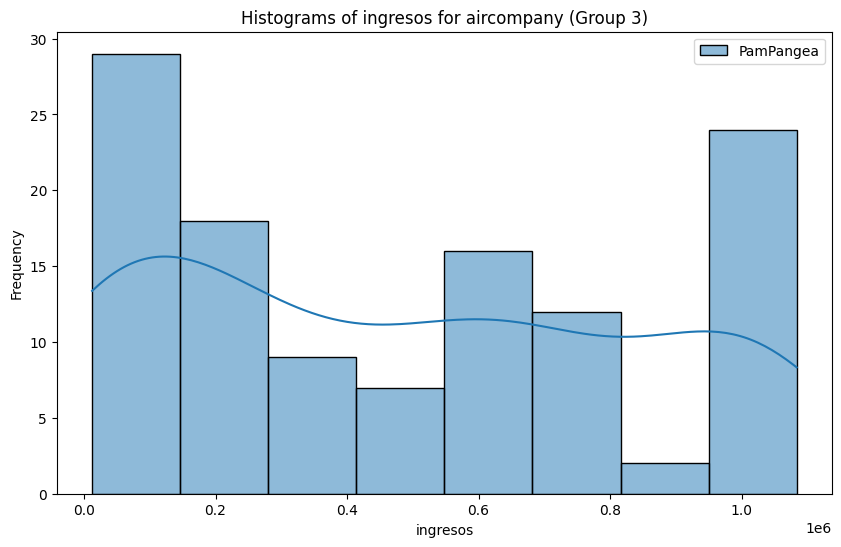

In [19]:
plot_grouped_histograms(viajes, cat_col="aircompany",num_col="ingresos", group_size= 2)

In [21]:
from scipy import stats

In [22]:
grupos = viajes['aircompany'].unique()  # Obtener los valores únicos de la columna categórica, en este caso la compañía área
ingresos_por_company = [viajes[viajes['aircompany'] == grupo]['ingresos'] for grupo in grupos] # obtenemos los ingresos por compañía y los incluimos en una lista
ingresos_por_company

[0       14232.65
 9      110108.07
 17     518685.45
 21     799063.90
 23     432558.22
          ...    
 573    732878.07
 577    754191.00
 580    928050.52
 596     87307.63
 597    339943.47
 Name: ingresos, Length: 100, dtype: float64,
 1       468527.19
 33      273824.24
 36      235350.43
 40       25642.94
 41      417965.59
           ...    
 575     429377.42
 581    1004810.48
 589     398905.47
 590      31227.48
 598     752212.98
 Name: ingresos, Length: 108, dtype: float64,
 2      584789.19
 4      438535.07
 10     111056.67
 12     184079.01
 13      46200.30
          ...    
 572    258737.92
 582    423371.06
 587    404542.35
 593    550268.31
 599    330320.81
 Name: ingresos, Length: 142, dtype: float64,
 3       233342.51
 5       728045.68
 6        13805.52
 11      764998.83
 16      719577.55
           ...    
 578      12372.41
 579     409713.51
 583    1006880.11
 584      70674.57
 585     225493.20
 Name: ingresos, Length: 133, dtype: float64,
 7

In [23]:
f_val, p_val = stats.f_oneway(*ingresos_por_company) # El método * (igual que cuando vimos *args hace mil años) 
                                                    # lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 15.68687291880937
Valor p: 3.267745855663723e-12


con este valor podemos decir que la hipotesis de base no se confirma y que por lo tanto las variables no son independientes, y podriamos extrapolar los datos. 

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


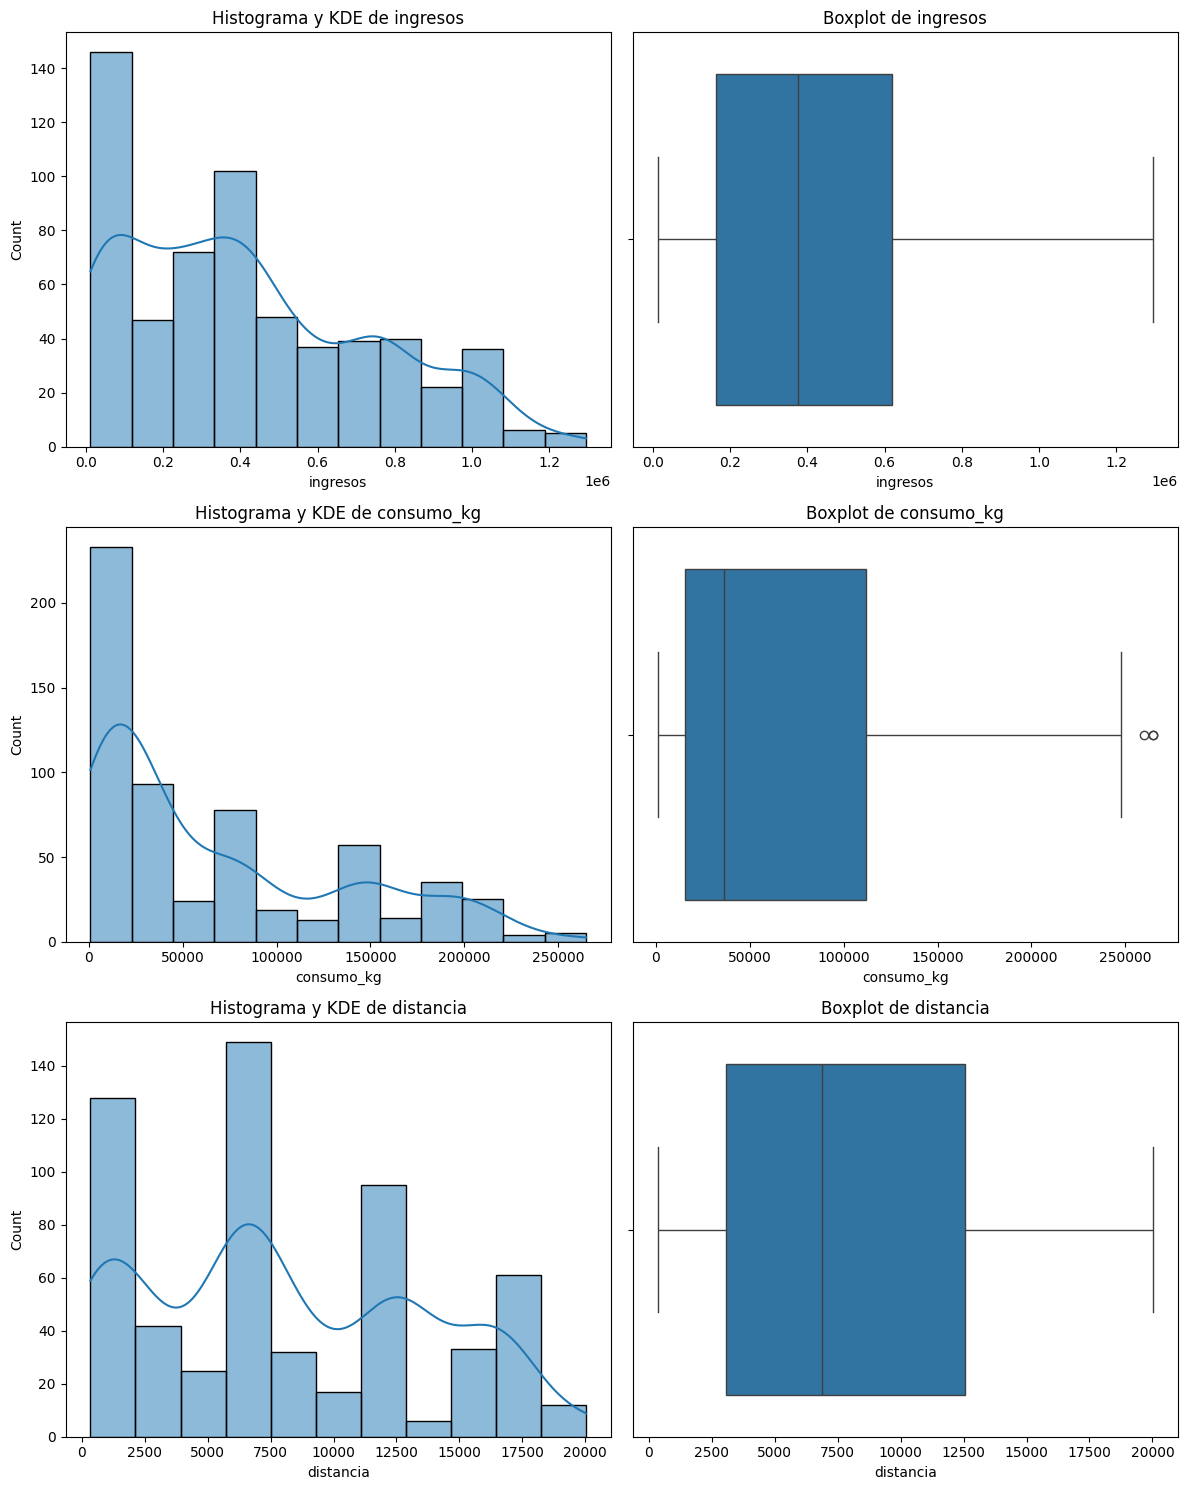

In [27]:
plot_combined_graphs(viajes,["ingresos","consumo_kg","distancia"])

In [29]:
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

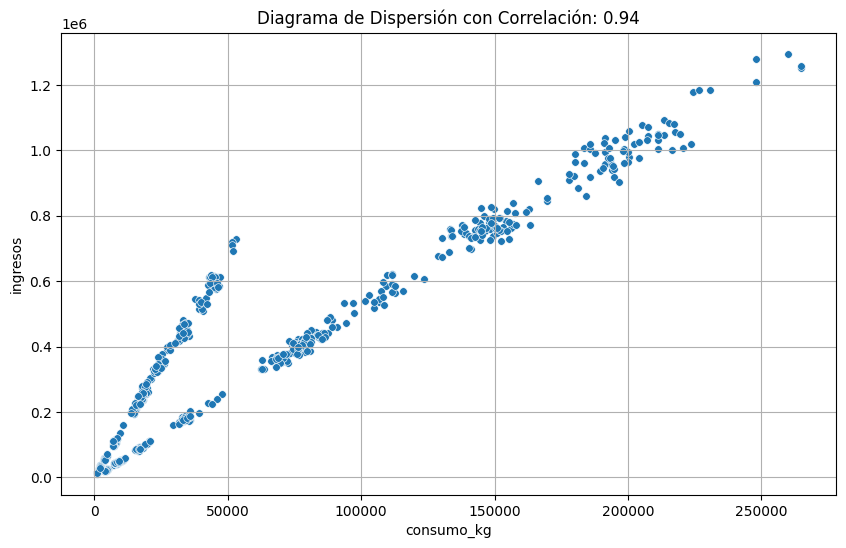

In [30]:
grafico_dispersion_con_correlacion(viajes,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

In [ ]:
por un consumo de 50.000 tenemos un ingreso que vale el doble del otro -> punto a destacar

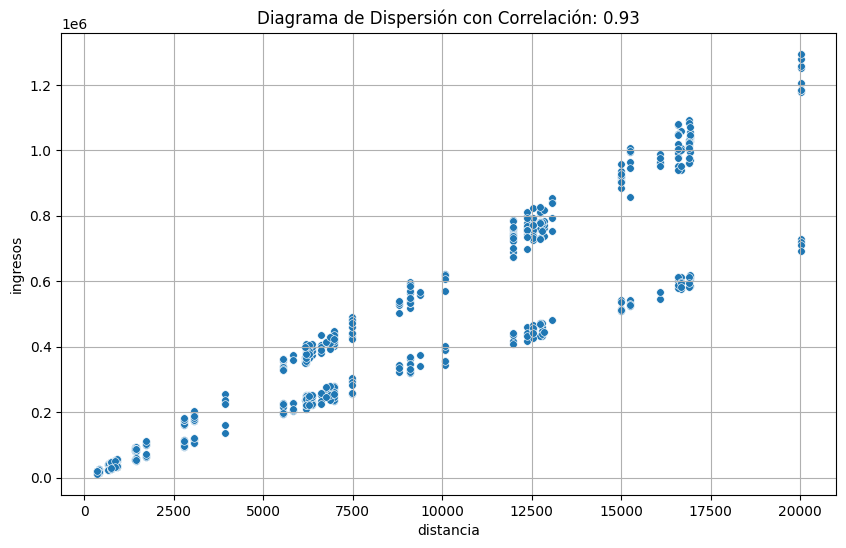

In [31]:
grafico_dispersion_con_correlacion(viajes,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

In [ ]:
aqui tambien a igual distancia en 20.000 tenemos un ingreso duplicado

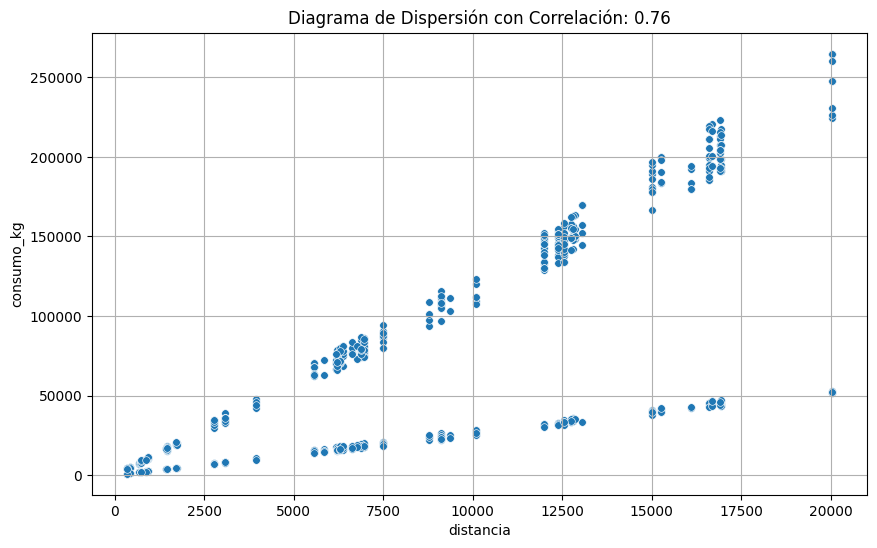

In [32]:
grafico_dispersion_con_correlacion(viajes,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

In [ ]:
y a igual distancia, tenemos una linea que consume hasta 4 veces lo mismo! 
asi que podemos ver que hay una linea que esta claramente mas economica, habria que ver porque.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [58]:
import numpy as np

In [64]:
#viajes["cat_vuelo"] = np.where (viajes["consumo_kg"] <= 5000,"viajes_cortos", "otro")


In [69]:

viajes.loc[viajes["consumo_kg"]<=5000, "cat_vuelo"] = "viajes_cortos"
viajes.loc[viajes["consumo_kg"]<11000, "cat_vuelo"]= "viajes_medianos"
viajes.loc[viajes["consumo_kg"]<=14000, "cat_vuelo"]= "viajes_largos"
viajes.loc[viajes["consumo_kg"]>19000, "cat_vuelo"]=  "viajes_enormes"

viajes

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,viajes_largos
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,viajes_enormes
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,viajes_enormes
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,NaN
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,viajes_enormes
...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,viajes_enormes
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,NaN
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,viajes_enormes
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,viajes_enormes


TypeError: cannot convert the series to <class 'int'>

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

In [80]:
ingr_kilo = viajes.ingresos/viajes.consumo_kg
kilogr_kilom = viajes.consumo_kg/viajes.distancia
ingr_kilo
kilogr_kilom
viajes["ingr_kilo"]=ingr_kilo
viajes["kilogr_kilom"]=kilogr_kilom
viajes.head(3)
viajes.describe().loc["mean"]


distancia         8071.003333
consumo_kg       68240.520508
duracion           635.873333
ingresos        418768.851500
ingr_kilo            8.904848
kilogr_kilom         7.934756
Name: mean, dtype: float64

In [ ]:
viajes.describe().loc["50%"]


distancia         6877.000000
consumo_kg       36033.998000
duracion           542.000000
ingresos        375481.745000
ingr_kilo            5.459427
kilogr_kilom        11.086400
Name: 50%, dtype: float64

In [ ]:
# las medias de las 2 nuevas variantes parecen tener importante dispercion al ver las medias y el valor del percentil 50
# miremos mas... 

In [84]:
viajes.describe()

,distancia,consumo_kg,duracion,ingresos,ingr_kilo,kilogr_kilom
count,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000
mean,8071.003333,68240.520508,635.873333,4.187689e+05,8.904848,7.934756
std,5550.244086,67441.849592,450.474786,3.182858e+05,4.407691,4.537013
min,344.000000,835.920000,42.000000,1.179785e+04,4.554666,2.430000
25%,3073.000000,15733.520400,224.000000,1.627668e+05,5.131672,2.660600
50%,6877.000000,36033.998000,542.000000,3.754817e+05,5.459427,11.086400
75%,12553.000000,111717.652800,876.000000,6.188420e+05,13.855693,11.906800
max,20029.000000,264876.314560,1721.000000,1.295516e+06,16.213469,13.224640


In [ ]:
# aqui se confirma muy bien la dispecion del kilogr por kilometro, en su percentil 50 y 75 tan cercano y el percentil 25 solo a 2,66.
# lo contrario para ingr/kilom, es el percentil 75 que se dispara. 
# miremos el IQR (para tener el valor medio de los  50% de los valores que no estan fuera de los bigotes)

In [85]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

get_IQR(viajes,"ingr_kilo")

np.float64(8.724020844221542)

In [ ]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

get_IQR(viajes,"kilogr_kilom")
#en este caso grande diferencia con la media a 7.934756, posibilidad de tener valores anomalos. 

np.float64(9.246199999999998)

In [91]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

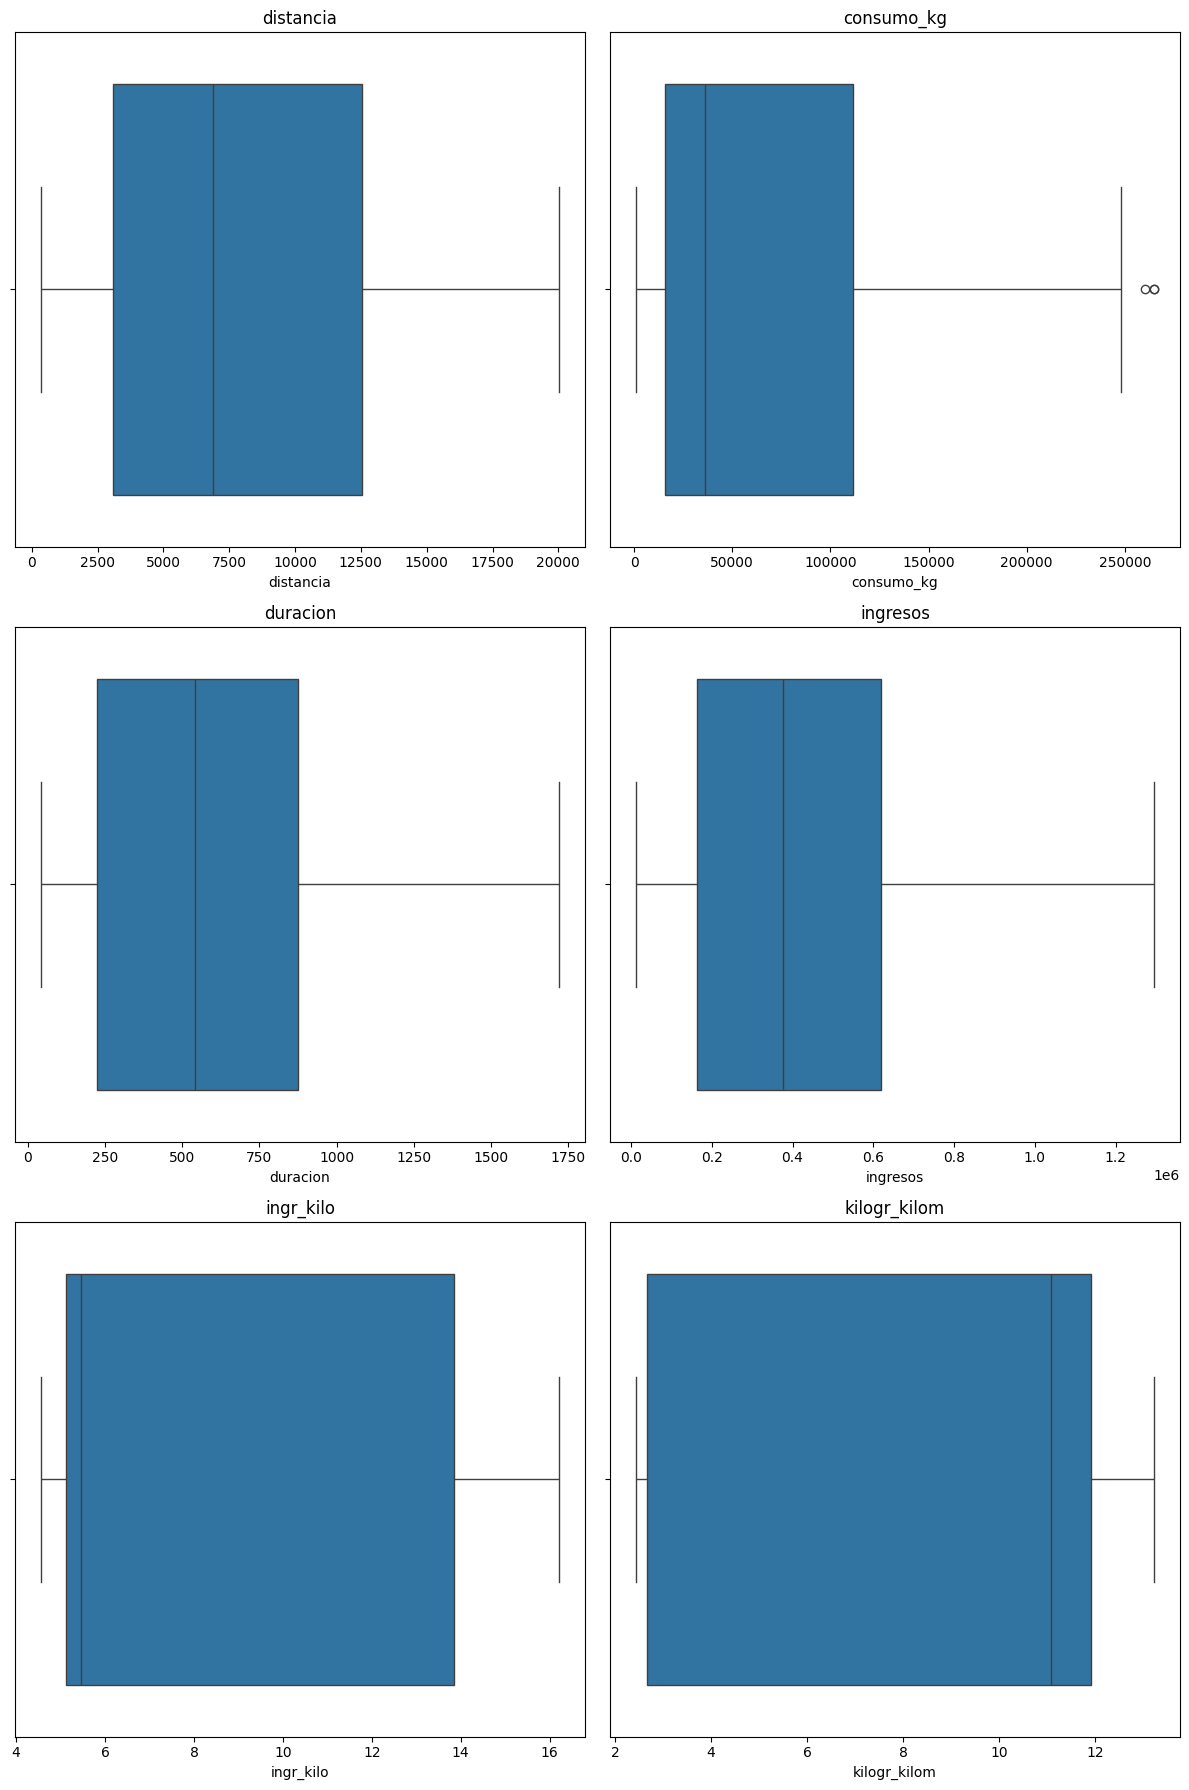

In [92]:
columnas_numericas = viajes.describe().T.index.to_list()
plot_multiple_boxplots(viajes, columnas_numericas)

<Axes: >

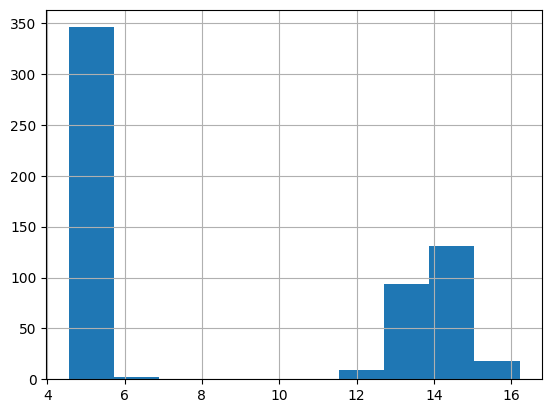

In [93]:
viajes["ingr_kilo"].hist()

<Axes: >

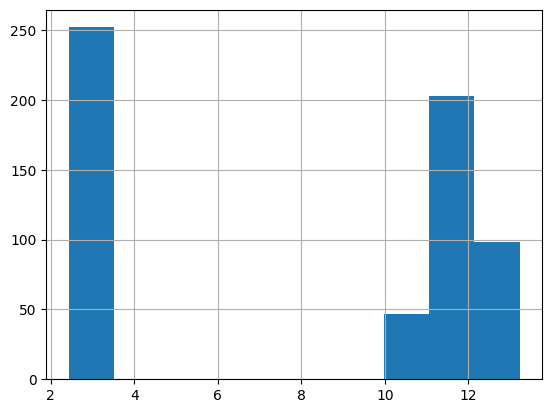

In [94]:
viajes["kilogr_kilom"].hist()

NameError: name 'plot_histo_den' is not defined